## The following codes classifies cascading failures in power grids suign various machine learning algorithms. Part of the results were used in my following paper

Models used: 

- Logistic regression
- Knearest neighbor
- Support vector machines
-
Paper link : https://www.researchgate.net/publication/334971986_Predicting_Cascading_Failures_in_Power_Grids_using_Machine_Learning_Algorithms


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('lg2.csv')

In [3]:
train.head()

,r,theta,e,fixed fail probability of neighbors,avg betwenness rounded,avg SP rounded,islands,flow capacity of the initially failed lines,total Number of line fail
0,0.5,0.10,0.20,0.02,0.2,6,8,216,2
1,0.5,0.15,0.10,0.02,0.4,2,4,56,1
2,0.9,0.10,0.05,0.01,0.1,5,1,108,0
3,0.9,0.25,0.10,0.01,0.3,7,2,394,0
4,0.9,0.05,0.05,0.03,0.2,4,1,79,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train.columns

Index(['r', 'theta', 'e', 'fixed fail probability of neighbors',
       'avg betwenness rounded', 'avg SP rounded', 'islands',
       'flow capacity of the initially failed lines',
       'total Number of line fail'],
      dtype='object')

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('total Number of line fail',axis=1), 
                                                    train['total Number of line fail'], test_size=0.30, 
                                                    random_state=101)

In [8]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\6394shuvror\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\6394shuvror\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
predictions = logmodel.predict(X_test)

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12951
           1       0.88      0.79      0.83      7509
           2       0.83      0.80      0.81      2517

    accuracy                           0.90     22977
   macro avg       0.87      0.86      0.86     22977
weighted avg       0.89      0.90      0.89     22977



In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test,predictions)

array([[12621,   330,     0],
       [ 1130,  5960,   419],
       [    1,   510,  2006]], dtype=int64)

In [14]:
logmodel.get_params(deep =True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
logmodel.coef_

array([[ 8.70645960e+00, -2.20626219e-01, -4.25038719e+00,
         6.57536733e+00, -1.61265153e+00,  2.92613771e-03,
        -2.55915241e+00, -2.29367829e-03],
       [-7.24619178e+00, -9.56968351e-02,  4.26310491e+00,
        -8.63685877e+00,  4.08844945e-01,  1.08862975e-02,
        -3.72385158e-02,  3.52586660e-03],
       [-2.58737147e+00, -3.30688976e-01,  1.66030210e+00,
        -1.28066510e+00,  4.29953513e-01, -1.99296119e-02,
         1.36554941e+00, -4.21834324e-04]])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(train.drop('total Number of line fail',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaler_f= scaler.transform(train.drop('total Number of line fail',axis=1))

In [20]:
scaler_f

array([[-1.41070313e+00, -7.06495351e-01,  7.12266145e-01, ...,
         2.83513377e-02,  1.34093729e+00,  3.72647716e-01],
       [-1.41070313e+00,  1.19199953e-03, -7.03209996e-01, ...,
        -1.43976489e+00,  1.69751383e-01, -8.36839634e-01],
       [ 1.41955381e+00, -7.06495351e-01, -1.41094807e+00, ...,
        -3.38677719e-01, -7.08638048e-01, -4.43756245e-01],
       ...,
       [-1.41070313e+00,  1.41656670e+00,  1.42000422e+00, ...,
        -7.05706776e-01,  7.55344337e-01, -3.90841174e-01],
       [ 4.42533679e-03,  1.41656670e+00, -1.41094807e+00, ...,
        -1.80679395e+00, -1.23045094e-01,  4.55799971e-01],
       [-1.41070313e+00, -7.06495351e-01,  4.52807467e-03, ...,
        -7.05706776e-01,  1.69751383e-01,  8.33764768e-01]])

In [21]:
train_feat = pd.DataFrame(scaler_f,columns=train.columns[:-1])

In [22]:
train_feat

,r,theta,e,fixed fail probability of neighbors,avg betwenness rounded,avg SP rounded,islands,flow capacity of the initially failed lines
0,-1.410703,-0.706495,0.712266,-0.383531,-0.233944,0.028351,1.340937,0.372648
1,-1.410703,0.001192,-0.703210,-0.383531,0.686579,-1.439765,0.169751,-0.836840
2,1.419554,-0.706495,-1.410948,-1.015164,-0.694205,-0.338678,-0.708638,-0.443756
3,1.419554,1.416567,-0.703210,-1.015164,0.226318,0.395380,-0.415842,1.718202
4,1.419554,-1.414183,-1.410948,0.248102,-0.233944,-0.705707,-0.708638,-0.662976
...,...,...,...,...,...,...,...,...
76582,0.004425,-1.414183,-1.410948,-0.383531,-0.694205,2.597555,-0.415842,-0.194299
76583,-1.410703,-0.706495,-1.410948,-1.015164,2.527624,0.028351,0.755344,-0.050673
76584,-1.410703,1.416567,1.420004,-1.015164,1.607101,-0.705707,0.755344,-0.390841
76585,0.004425,1.416567,-1.410948,-1.015164,0.226318,-1.806794,-0.123045,0.455800


In [23]:
X = train_feat
y = train['total Number of line fail']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

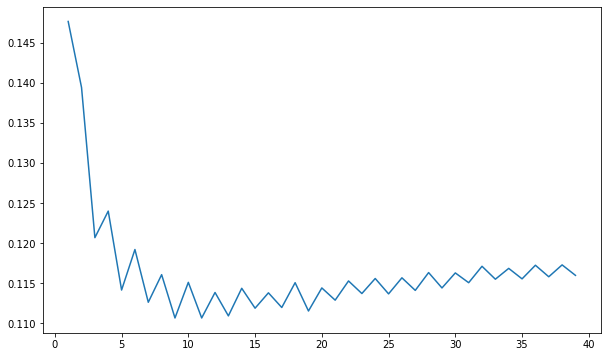

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [30]:
knn = KNeighborsClassifier(n_neighbors=9)

In [31]:
print(confusion_matrix(y_test,pred_i))
print('\n')
print(classification_report(y_test,pred_i))

[[12783   168     0]
 [ 1561  5839   109]
 [    4   823  1690]]


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     12951
           1       0.85      0.78      0.81      7509
           2       0.94      0.67      0.78      2517

    accuracy                           0.88     22977
   macro avg       0.90      0.81      0.84     22977
weighted avg       0.88      0.88      0.88     22977



In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
predictions = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12951
           1       0.80      0.80      0.80      7509
           2       0.75      0.79      0.77      2517

    accuracy                           0.87     22977
   macro avg       0.83      0.84      0.83     22977
weighted avg       0.87      0.87      0.87     22977



In [38]:
print(confusion_matrix(y_test,predictions))

[[12032   918     1]
 [  864  5989   656]
 [    0   535  1982]]


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[12474   477     0]
 [  772  6421   316]
 [    0   510  2007]]


In [42]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12951
           1       0.87      0.86      0.86      7509
           2       0.86      0.80      0.83      2517

    accuracy                           0.91     22977
   macro avg       0.89      0.87      0.88     22977
weighted avg       0.91      0.91      0.91     22977



In [43]:
from sklearn.svm import SVC

In [44]:
model = SVC()

In [45]:
model.fit(X_train,y_train)

C:\Users\6394shuvror\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[12571   380     0]
 [  852  6408   249]
 [    0   554  1963]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12951
           1       0.87      0.85      0.86      7509
           2       0.89      0.78      0.83      2517

    accuracy                           0.91     22977
   macro avg       0.90      0.87      0.88     22977
weighted avg       0.91      0.91      0.91     22977



In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
ada = AdaBoostClassifier()

In [49]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [50]:
ada_pred = ada.predict(X_test)

In [51]:
print(confusion_matrix(y_test,ada_pred))

[[12583   368     0]
 [  960  5111  1438]
 [    0   318  2199]]


In [52]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12951
           1       0.88      0.68      0.77      7509
           2       0.60      0.87      0.71      2517

    accuracy                           0.87     22977
   macro avg       0.81      0.84      0.81     22977
weighted avg       0.88      0.87      0.86     22977

